# 가우시안 믹스쳐 모델 (Gaussian Mixture Model, GMM)

**가우시안 믹스쳐 모델(GMM)**은 전체 데이터가 여러 개의 가우시안(정규) 분포가 혼합되어 생성되었다고 가정하는 확률 모델임. 각 데이터 포인트가 어떤 가우시안 분포(클러스터)에 속하는지 확률적으로 추정하여, K-평균과 같은 하드 클러스터링(Hard Clustering)과 달리 부드러운 클러스터링(Soft Clustering)을 수행함.

GMM은 클러스터링뿐만 아니라 데이터의 분포를 추정하는 밀도 추정(Density Estimation)에도 널리 사용됨. 각 클러스터가 타원형을 가질 수 있어 K-평균보다 복잡한 형태의 데이터 군집을 잡아낼 수 있음.

### 수학적 배경 📐
GMM은 K개의 가우시안 분포의 가중합으로 전체 데이터의 확률 분포 $p(x)$를 모델링함.

$$ p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k) $$

여기서 각 기호의 의미는 다음과 같음:
- $K$: 혼합된 가우시안 분포의 개수 (클러스터의 개수)
- $\pi_k$: $k$번째 가우시안 분포의 **혼합 계수(Mixture weight)**. 즉, 데이터가 $k$번째 클러스터에서 왔을 사전 확률을 의미하며, 모든 $\pi_k$의 합은 1임 ($\sum_{k=1}^{K} \pi_k = 1$).
- $\mathcal{N}(x | \mu_k, \Sigma_k)$: $k$번째 가우시안 분포의 확률 밀도 함수. **평균(mean)** $\mu_k$와 **공분산(covariance)** $\Sigma_k$을 파라미터로 가짐.

모델의 파라미터($\pi_k, \mu_k, \Sigma_k$)는 주로 **기댓값-최대화(Expectation-Maximization, EM)** 알고리즘을 통해 데이터로부터 학습됨.

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

### 예제 데이터 준비 (Data Preparation)
GMM을 시연하기 위해, 중심점이 명확한 2차원 데이터를 인위적으로 생성함. 클러스터 개수는 3개로 설정함.

데이터 형태(shape): (400, 2)


C:\Users\brigh\AppData\Local\Temp\ipykernel_17720\3634197871.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


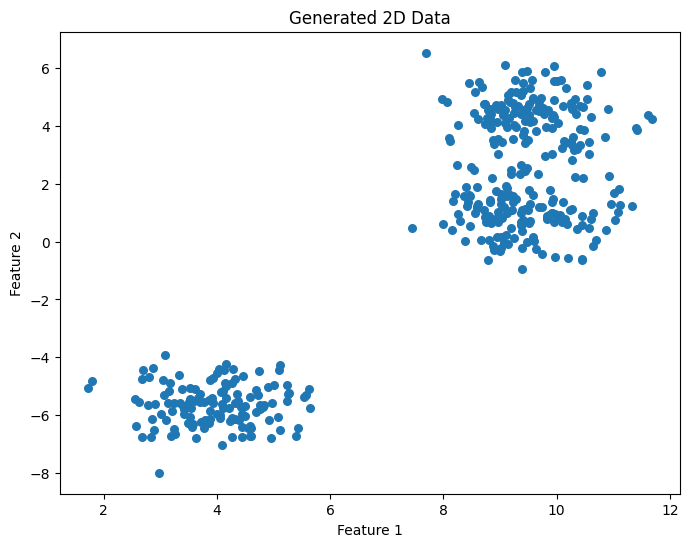

In [2]:
# 3개의 클러스터를 갖는 2D 데이터 생성
X, y_true = make_blobs(n_samples=400, centers=3, 
                      cluster_std=0.8, random_state=4)

# 데이터 형태 확인
print(f"데이터 형태(shape): {X.shape}")

# 생성된 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Generated 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 핵심 로직 구현 (Code Implementation)
`scikit-learn`의 `GaussianMixture`를 사용하여 GMM을 학습시킴. 가장 중요한 하이퍼파라미터는 가우시안 분포의 개수를 의미하는 `n_components`임.

In [3]:
# GMM 모델 생성 및 학습
# n_components: 찾으려는 클러스터(가우시안 분포)의 개수
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델을 데이터에 적합시킴 (EM 알고리즘 실행)
gmm.fit(X)

# 각 데이터 포인트가 속할 클러스터를 예측 (하드 클러스터링)
labels = gmm.predict(X)

# 각 데이터 포인트가 각 클러스터에 속할 확률을 예측 (소프트 클러스터링)
probs = gmm.predict_proba(X)

print("GMM 모델 학습 완료.")

GMM 모델 학습 완료.


### 결과 확인 및 시각화 (Results & Visualization) 📊
학습된 GMM의 파라미터와 클러스터링 결과를 확인하고 시각화함. 학습된 평균과 공분산을 이용해 각 가우시안 분포를 타원으로 표현함.

In [4]:
# 학습된 파라미터 확인
print(f"혼합 계수 (Weights): {gmm.weights_}\n")
print(f"평균 (Means): \n{gmm.means_}\n")
# print(f"공분산 (Covariances): \n{gmm.covariances_}\n") # 공분산 행렬은 복잡하므로 주석 처리

# 첫 5개 데이터의 클러스터 할당 확률 확인
print("첫 5개 데이터의 클러스터 할당 확률:")
for i in range(5):
    print(f"  데이터 {i}: Label={labels[i]}, Probs={np.round(probs[i], 3)}")

혼합 계수 (Weights): [0.3325     0.32737917 0.34012083]

평균 (Means): 
[[ 3.96412363 -5.63685618]
 [ 9.56814268  4.40304473]
 [ 9.42234919  0.96893552]]

첫 5개 데이터의 클러스터 할당 확률:
  데이터 0: Label=1, Probs=[0. 1. 0.]
  데이터 1: Label=1, Probs=[0. 1. 0.]
  데이터 2: Label=0, Probs=[1. 0. 0.]
  데이터 3: Label=0, Probs=[1. 0. 0.]
  데이터 4: Label=1, Probs=[0. 1. 0.]


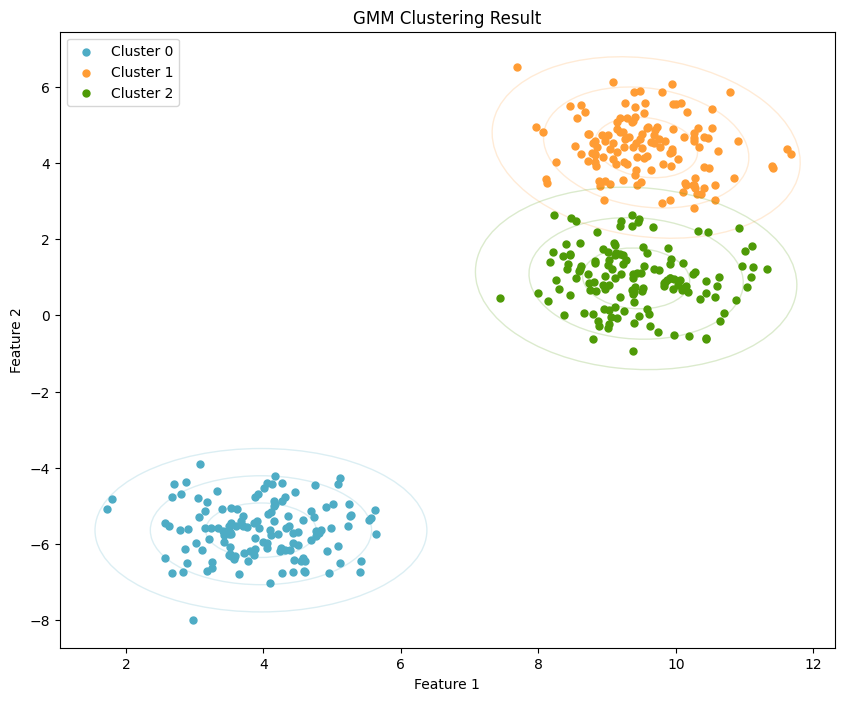

In [8]:
# 시각화를 위한 함수 정의: 가우시안 분포를 타원으로 그리기
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, facecolor='none', **kwargs):
    """주어진 평균(position)과 2x2 공분산 행렬(covariance)에 대응하는 타원을 (1,2,3) 시그마 범위로 그림.
    covariance: (2,2) 또는 길이 2의 대각 성분 배열이 올 수 있음.
    """
    ax = ax or plt.gca()

    # covariance 형태 통일: (2,2) 또는 (2,) 허용
    cov = np.array(covariance)
    if cov.shape == (2,):  # 대각선만 온 경우
        cov = np.diag(cov)
    if cov.shape != (2, 2):
        raise ValueError(f"2D 공분산 행렬이어야 합니다. 받음 shape={cov.shape}")

    # SVD로 주축 길이 및 회전각 추출
    try:
        U, s, Vt = np.linalg.svd(cov)
    except np.linalg.LinAlgError:
        # 수치적 문제 발생 시 아주 작은 값 더해 복구
        cov = cov + np.eye(2) * 1e-6
        U, s, Vt = np.linalg.svd(cov)

    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)  # 1-sigma (표준편차) 길이 * 2 = 지름

    for nsig in (1, 2, 3):
        e = Ellipse(position, nsig * width, nsig * height,
                    angle=angle, facecolor=facecolor,
                    edgecolor=kwargs.get('edgecolor', kwargs.get('color', 'k')),
                    lw=1, alpha=kwargs.get('alpha', 0.25))
        ax.add_patch(e)

# 결과 시각화
def plot_gmm_result(X, labels, gmm):
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#8E44AD', '#16A085']
    for i in range(gmm.n_components):
        data = X[labels == i]
        plt.scatter(data[:, 0], data[:, 1], s=25, color=colors[i % len(colors)], label=f'Cluster {i}')
        draw_ellipse(gmm.means_[i], gmm.covariances_[i], ax=ax, color=colors[i % len(colors)], alpha=0.2)

    plt.title("GMM Clustering Result")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# 호출
plot_gmm_result(X, labels, gmm)

### 고려사항 (Considerations)
- **클러스터 개수(K) 선택**: `n_components`는 GMM의 성능에 큰 영향을 미치는 하이퍼파라미터임. 적절한 K를 찾기 위해 **AIC(Akaike Information Criterion)**나 **BIC(Bayesian Information Criterion)**와 같은 모델 선택 기준을 사용할 수 있음. `scikit-learn`의 GMM 객체는 `aic()`와 `bic()` 메서드를 제공함.
- **초기값 민감성**: EM 알고리즘은 초기 파라미터 값에 따라 결과가 달라질 수 있음. `scikit-learn`에서는 `n_init` 파라미터를 통해 여러 다른 초기값으로 여러 번 실행하여 가장 좋은 결과를 선택함으로써 이 문제를 완화함.
- **공분산 형태**: `covariance_type` 파라미터('full', 'tied', 'diag', 'spherical')를 통해 각 클러스터의 공분산 행렬 형태를 제약할 수 있음. 이는 클러스터의 모양을 결정하며, 데이터의 특성에 맞게 설정해야 함.

### 최종 요약 (Conclusion)
본 노트북에서는 가우시안 믹스쳐 모델(GMM)의 개념을 이해하고, `scikit-learn`을 활용하여 GMM 클러스터링을 직접 수행하였음.

GMM은 데이터를 여러 가우시안 분포의 혼합으로 간주하여 각 데이터가 특정 클러스터에 속할 확률을 계산하는 **소프트 클러스터링** 모델임. 시각화 결과를 통해 GMM이 데이터의 분포 형태(평균, 공분산)를 학습하여 타원형의 클러스터를 효과적으로 식별하는 것을 확인할 수 있었음. 이는 단순한 거리 기반의 K-평균 클러스터링보다 유연한 군집화를 가능하게 함.